<a href="https://colab.research.google.com/github/sunrita007/Miscellanous_Codes/blob/main/SearchPilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Libraries required for this are as follows:

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import log
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.formula.api as smf
import scipy.stats as sts
from scipy.stats import t


The page https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2022-01-01&end=2022-08-23&pages=Figma_(software) had the option of converting in CSV which has been called in this code for modelling

In [2]:
df = pd.read_csv('./Wikipedia_data.csv')
df = df.set_index('Date')
df_comp = df

In [3]:
df.tail()

,Figma (software)
Date,
2022-08-19,1375
2022-08-20,1030
2022-08-21,1100
2022-08-22,1670
2022-08-23,1684


In [4]:
df.head()

,Figma (software)
Date,
2022-01-01,632
2022-01-02,742
2022-01-03,1134
2022-01-04,1217
2022-01-05,1378


In [5]:
df.isna().sum()

Figma (software)    0
dtype: int64

In [6]:
#df = df.asfreq('b')

In [7]:
a = len(df. index) 
print(a)

235


#Data Cleaning

In [8]:
df.describe()

,Figma (software)
count,235.000000
mean,1323.736170
std,293.574476
min,632.000000
25%,1057.500000
50%,1372.000000
75%,1536.500000
max,2723.000000


In [9]:
df. isna(). sum()

Figma (software)    0
dtype: int64

Substantiating the variable we will work with

In [10]:
x = df['Figma (software)']
x_log = log(x)
df.head()
print(type(x))

<class 'pandas.core.series.Series'>


#Stationary Check

This process allows us to check the property that the mean, variance and autocorrelation structure do not change over time.

#How to take window for this Dataset

If your data has 235 observations per year from January to August, and you want to predict data for half a year (6 months), then you would use a window of at least 118 observations (235/2). This way, each forecasted value would be based on the mean of the previous 117 observations and the current observation.

Keep in mind that this is just a rough estimate and the optimal window size may differ based on the specifics of your data and the question you are trying to answer. It may also be helpful to experiment with different window sizes to see which one results in the most accurate predictions.

235
Date
2022-01-01            NaN
2022-01-02            NaN
2022-01-03            NaN
2022-01-04            NaN
2022-01-05            NaN
                 ...     
2022-08-19    1450.666667
2022-08-20    1408.833333
2022-08-21    1378.750000
2022-08-22    1373.166667
2022-08-23    1387.416667
Name: Figma (software), Length: 235, dtype: float64
224


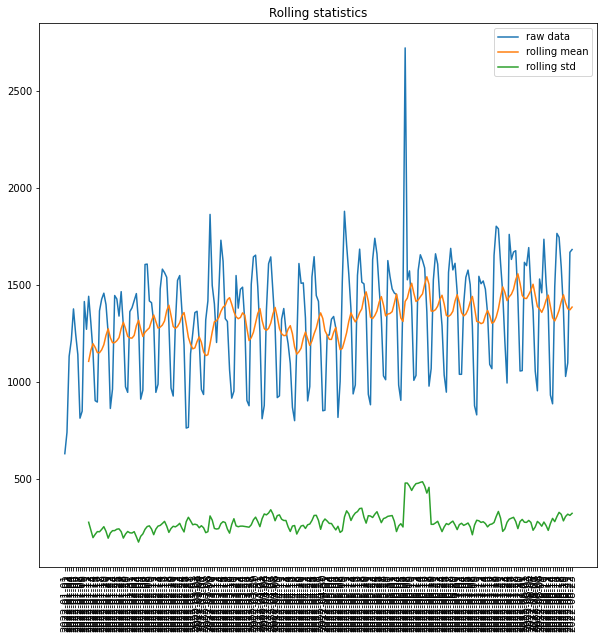

In [11]:
#  plot rolling statistics 
plt.figure(figsize=(10, 10))
roll_mean = x.rolling(window=12).mean()
roll_std = x.rolling(window=12).std()
plt.plot(x, label = 'raw data')
plt.plot(roll_mean, label = 'rolling mean')
plt.plot(roll_std, label = 'rolling std')
plt.xticks(rotation='vertical')
plt.title('Rolling statistics')
plt.legend()
print(x.size)
print(roll_mean)
x2 = x -roll_mean
x3 = x2.dropna()
print(x3.size)

x.rolling(window=12).mean() is a method in Pandas library used for computing the moving average of a given data.

x is a pandas dataframe or a pandas series object representing a time series data.
rolling is a rolling window calculation method in Pandas that calculates the statistic of a set of values within a moving window.
window=12 specifies the size of the window (i.e. number of consecutive values) over which the mean is calculated.
mean() computes the mean of the values within the moving window.
The result of x.rolling(window=12).mean() is a new pandas dataframe/series with the same size as the original one, where each value is the mean of the previous window values.

In [12]:
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
p0 = result[1]

ADF Statistic: -2.779780
p-value: 0.061221
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574


The results of the ADF test provide information about the stationarity of a time series. In the case of the example you provided, the ADF statistic is -2.779780, the p-value is 0.061221, and the critical values are -3.461 (1%), -2.875 (5%), and -2.574 (10%).

The ADF statistic is a measure of how far the sample autocorrelation coefficient is from 0. The closer it is to 0, the stronger the evidence against the null hypothesis (that there is a unit root in the time series, meaning the time series is non-stationary). In this case, the ADF statistic is a negative number, but not as large as the previous example, which means that the evidence against the null hypothesis is weaker and the time series may not be stationary.

The p-value is the probability of observing a test statistic as extreme or more extreme than the one computed, assuming the null hypothesis is true. A low p-value (less than 0.05) indicates strong evidence against the null hypothesis and in favor of the alternative hypothesis (that the time series is stationary). In this case, the p-value is 0.061221, which is greater than 0.05, which means that the evidence is not strong enough to reject the null hypothesis, and the time series may not be stationary.

The critical values are the values of the test statistic that correspond to the significance levels specified (1%, 5%, and 10%). If the test statistic is less than the critical value at a given level of significance, then the null hypothesis is rejected at that level of significance. In this case, the test statistic is greater than the critical values at all levels of significance, which means that the null hypothesis can't be rejected, and the time series may not be stationary.

In this example, the test suggests that the time series is not stationary, but the p-value is not low enough to reject the null hypothesis with complete confidence. It's important to note that there are multiple ways to test for stationarity, and it's recommended to use multiple tests or other methods to confirm the stationarity or non-stationarity of the time series. Also, depending on the nature of the time series, data preprocessing or transformation may be needed before applying the test to get more robust results.






#Stationarize

Detrending: Removing a trend from a time series can help to make it stationary, as a trend can create a non-constant mean, which is one of the characteristics of a non-stationary time series. Detrending can be achieved by subtracting a trend line from the original data.

Differentiating: A time series may be non-stationary because of a trend, but also because of a change in variance over time. This is often the case with economic time series. Differentiating a time series means subtracting each observation from the previous observation. This can help to remove a trend and stabilize the variance.

Logging: Logging a time series can help to stabilize the variance, particularly when the data has exponential growth. Logging a time series can also help to reduce skewness.

Log-likelihood: Log-likelihood is a measure of how well a model fits the data. Log-likelihood can be used to compare the fit of different models to the same data, and can help in model selection. For example, if two models have similar log-likelihood values, then the model with fewer parameters is preferred as it is simpler and easier to interpret.

These are some of the ways you can preprocess and analyze time series data, these methods can help to make the data stationary and help to improve the accuracy of any statistical models you may use on the data.

This helps us helps us identify the driving factors: when we detect a change in a time series and a change in some other time series, we may be able to infer a correlation.

In [13]:
#Detrend
x1 = (x - roll_mean)
result = adfuller(x1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
p1 = result[1]

ADF Statistic: -5.248741
p-value: 0.000007
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574


**Null hypothesis: The null hypothesis for the ADF test is that there is a unit root present in the data, which means that the time series is non-stationary and has a tendency to exhibit persistent trends over time.**

The results of the ADF test provide information about the stationarity of a time series. In the case of the example you provided, the ADF statistic is -5.248741, the p-value is 0.000007, and the critical values are -3.462 (1%), -2.876 (5%), and -2.574 (10%).

The ADF statistic is a measure of how far the sample autocorrelation coefficient is from 0. The closer it is to 0, the stronger the evidence against the null hypothesis (that there is a unit root in the time series, meaning the time series is non-stationary). In this case, the ADF statistic is a large negative number, which suggests that there is strong evidence against the null hypothesis and that the time series is likely stationary.

The p-value is the probability of observing a test statistic as extreme or more extreme than the one computed, assuming the null hypothesis is true. A low p-value (less than 0.05) indicates strong evidence against the null hypothesis and in favor of the alternative hypothesis (that the time series is stationary). In this case, the p-value is 0.000007, which is a very low value and suggests that the null hypothesis can be rejected with high confidence and the time series is likely stationary.

The critical values are the values of the test statistic that correspond to the significance levels specified (1%, 5%, and 10%). If the test statistic is less than the critical value at a given level of significance, then the null hypothesis is rejected at that level of significance. In this case, the test statistic is less than all of the critical values, which means that the **null hypothesis is rejected at all levels of significance and the time series is confirmed to be stationary.**

In this example, the test suggests that the time series is stationary, and the p-value is very low, which makes the results very robust. It's important to note that there are multiple ways to test for stationarity, and it's recommended to use multiple tests or other methods to confirm the stationarity or non-stationarity of the time series. Also, depending on the nature of the time series, data preprocessing or transformation may be needed before applying the test to get more robust results

#x.shitf()

The shift() method in Python's Pandas library is used to shift the position of a time series data by a specified number of periods. It returns a new DataFrame or Series with the values shifted either forward or backward along the time axis.

The basic syntax for using the shift() method is as follows:

python
Copy code
data.shift(periods=1, freq=None, axis=0)
where:

periods: Number of periods to shift. A positive value shifts the data forward, while a negative value shifts the data backward.
freq: Specifies the time offset to use for shifting the data.
axis: Specifies the axis to shift. By default, the axis is 0 (row-wise), but you can also shift the data column-wise by setting axis=1.
The shift() method is commonly used in financial analysis, where it is used to shift a time series data to align with different time frames or to compare the current value with a previous value. It is also used in various other applications, such as time series analysis, where it is used to shift the data to perform operations such as lag analysis and lead analysis.

In [14]:
#differentiating 
x2 = x - x.shift()
result = adfuller(x2.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
p2 = result[1]

ADF Statistic: -8.981848
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


The results of the ADF test provide information about the stationarity of a time series. In the case of the example you provided, the ADF statistic is -8.981848, the p-value is 0.000000, and the critical values are -3.460 (1%), -2.875 (5%), and -2.574 (10%).

The ADF statistic is a measure of how far the sample autocorrelation coefficient is from 0. The closer it is to 0, the stronger the evidence against the null hypothesis (that there is a unit root in the time series, meaning the time series is non-stationary). In this case, the ADF statistic is an even more larger negative number than before, which suggests that there is even stronger evidence against the null hypothesis and that the time series is likely stationary.

The p-value is the probability of observing a test statistic as extreme or more extreme than the one computed, assuming the null hypothesis is true. A low p-value (less than 0.05) indicates strong evidence against the null hypothesis and in favor of the alternative hypothesis (that the time series is stationary). In this case, the p-value is 0.000000, which is a very low value and suggests that the null hypothesis can be rejected with very high confidence and the time series is likely stationary.

The critical values are the values of the test statistic that correspond to the significance levels specified (1%, 5%, and 10%). If the test statistic is less than the critical value at a given level of significance, then the null hypothesis is rejected at that level of significance. In this case, the test statistic is less than all of the critical values, which means that the **null hypothesis is rejected at all levels of significance and the time series is confirmed to be stationary.**

In this example, the test suggests that the time series is stationary, and the p-value is very low, which makes the results very robust and the evidence for stationarity is extremely strong. It's important to note that there are multiple ways to test for stationarity, and it's recommended to use multiple tests or other methods to confirm the stationarity or non-stationarity of the time series. Also, depending on the nature of the time series, data preprocessing or transformation may be needed before applying the test to get more robust results.

In [15]:
#logging
x3 = x_log
result = adfuller(x3.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
p3 = result[1]

ADF Statistic: -2.666403
p-value: 0.080035
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


The results of the ADF test provide information about the stationarity of a time series. In the case of the example you provided, the ADF statistic is -2.666403, the p-value is 0.080035, and the critical values are -3.460 (1%), -2.875 (5%), and -2.574 (10%).

The ADF statistic is a measure of how far the sample autocorrelation coefficient is from 0. The closer it is to 0, the stronger the evidence against the null hypothesis (that there is a unit root in the time series, meaning the time series is non-stationary). In this case, the ADF statistic is a negative number but it is not as large as before, which suggests that the evidence against the null hypothesis is not as strong as before and that the time series may not be stationary.

The p-value is the probability of observing a test statistic as extreme or more extreme than the one computed, assuming the null hypothesis is true. A low p-value (less than 0.05) indicates strong evidence against the null hypothesis and in favor of the alternative hypothesis (that the time series is stationary). In this case, the p-value is 0.080035, which is a relatively high value, and suggests that the null hypothesis cannot be rejected with high confidence, and the time series may not be stationary.

The critical values are the values of the test statistic that correspond to the significance levels specified (1%, 5%, and 10%). If the test statistic is less than the critical value at a given level of significance, then the null hypothesis is rejected at that level of significance. In this case, the test statistic is greater than the critical values at 1% and 5% level of significance, which means that the null hypothesis is not rejected at those levels of significance, and the time series may not be stationary.

In this example, the test suggests that the time series may not be stationary, and the p-value is relatively high, which means that the evidence for stationarity is not very strong. It's important to note that there are multiple ways to test for stationarity, and it's recommended to use multiple tests or other methods to confirm the stationarity or non-stationarity of the time series. Also, depending on the nature of the time series, data preprocessing or transformation may be needed before applying the test to get more robust results.

#Log_differencing Calculation

Log differencing is a common technique used to remove trends and seasonality from a time series data and make it stationary. It is performed by taking the natural logarithm of the data and then subtracting the value of the logarithm at the previous time step. The result is a new series of the log differences, which should have a constant mean and variance if the original time series is stationary.

The formula for log differencing is as follows:

c
Copy code
y_t = log(x_t) - log(x_{t-1})
where x_t is the value of the original time series at time t, and y_t is the value of the log differences at time t.

To calculate log differencing in Pandas, you can use the following code:

kotlin
Copy code
import pandas as pd

data = pd.read_csv("data.csv")

log_data = np.log(data)
log_diff = log_data - log_data.shift(1)
Here, data is your original time series data, log_data is the logarithm of the data, and log_diff is the log differences. The shift() method is used to subtract the value of the logarithm at the previous time step. The log differences should be a stationary time series if the original time series was stationary.

In [16]:
#Log differencing 
x4 = x3 - x3.shift()
result = adfuller(x4.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
p4 = result[1]

ADF Statistic: -6.870571
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574


The results of the ADF test provide information about the stationarity of a time series. In the case of the example you provided, the ADF statistic is -6.870571, the p-value is 0.000000, and the critical values are -3.460 (1%), -2.875 (5%), and -2.574 (10%).

The ADF statistic is a measure of how far the sample autocorrelation coefficient is from 0. The closer it is to 0, the stronger the evidence against the null hypothesis (that there is a unit root in the time series, meaning the time series is non-stationary). In this case, the ADF statistic is a large negative number, which suggests that there is strong evidence against the null hypothesis and that the time series is likely stationary.

The p-value is the probability of observing a test statistic as extreme or more extreme than the one computed, assuming the null hypothesis is true. A low p-value (less than 0.05) indicates strong evidence against the null hypothesis and in favor of the alternative hypothesis (that the time series is stationary). In this case, the p-value is 0.000000, which suggests that the null hypothesis can be rejected and the time series is likely stationary.

The critical values are the values of the test statistic that correspond to the significance levels specified (1%, 5%, and 10%). If the test statistic is less than the critical value at a given level of significance, then the null hypothesis is rejected at that level of significance. In this case, the test statistic is less than all of the critical values, which means that the null hypothesis is rejected at all levels of significance and the time series is confirmed to be stationary.




Regenerate

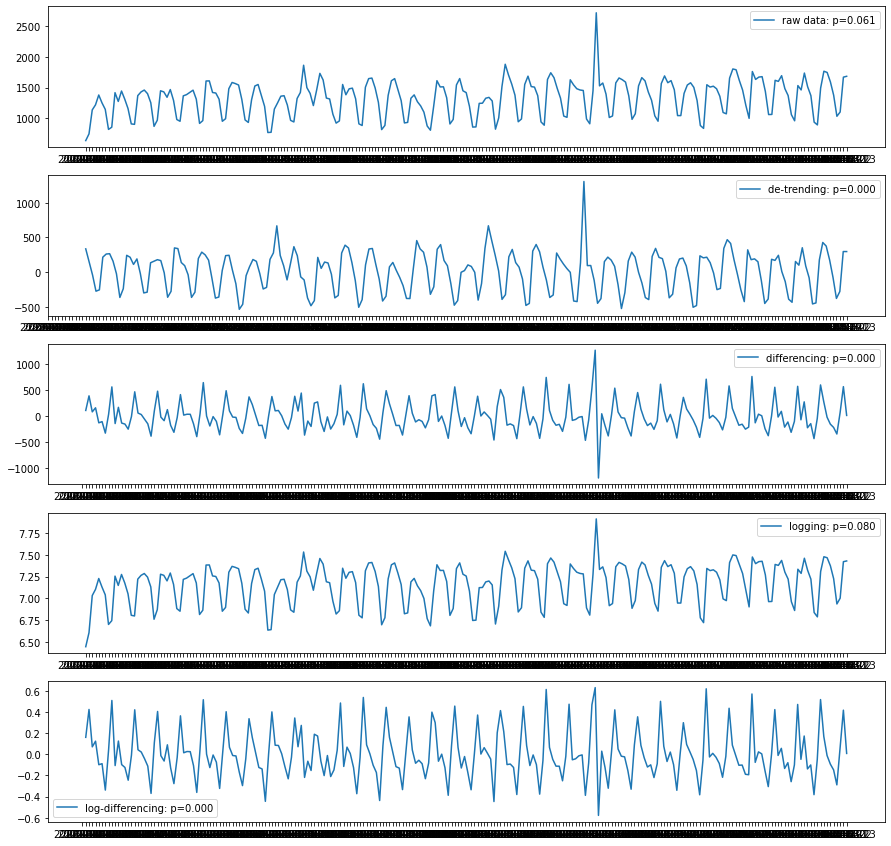

In [17]:
#Plotting 
plt.figure(figsize=(15, 15))
plt.subplot(5,1,1)
plt.plot(x, label = 'raw data: p='+str('%.3f'%p0))
plt.legend()
plt.subplot(5,1,2)
plt.plot(x1, label = 'de-trending: p='+str('%.3f'%p1))
plt.legend()
plt.subplot(5,1,3)
plt.plot(x2, label = 'differencing: p='+str('%.3f'%p2))
plt.legend()
plt.subplot(5,1,4)
plt.plot(x3, label = 'logging: p='+str('%.3f'%p3))
plt.legend()
plt.subplot(5,1,5)
plt.plot(x4, label = 'log-differencing: p='+str('%.3f'%p4))
plt.legend()

#Seasonality 

Time series data may contain seasonal variation. Seasonal variation, or seasonality, are cycles that repeat regularly over time. A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period.

Autocorrelation and partial autocorrelation are measures of association between current and past series values and indicate which past series values are most useful in predicting future values.

In [18]:
df_comp.columns

Index(['Figma (software)'], dtype='object')

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_comp = df_comp.rename(columns={"Figma (software)": "a"})
s_dec_add = seasonal_decompose(df_comp.a, model = "additive",extrapolate_trend='freq', period=1)
s_dec_mul = seasonal_decompose(df_comp.a, model = "multiplicative",extrapolate_trend='freq', period=1)

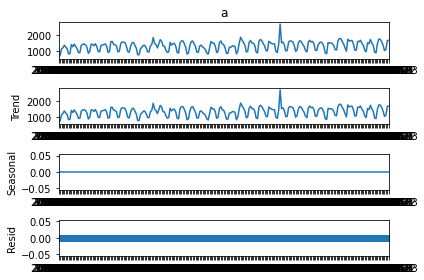

In [20]:
s_dec_add.plot()
plt.show()

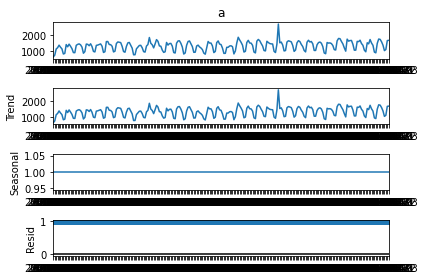

In [21]:
s_dec_mul.plot()
plt.show()

Text(0.5, 1.0, 'ACF of de-trended data')

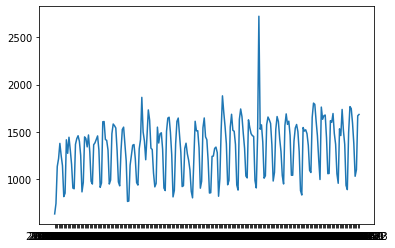

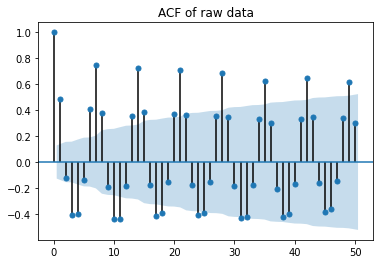

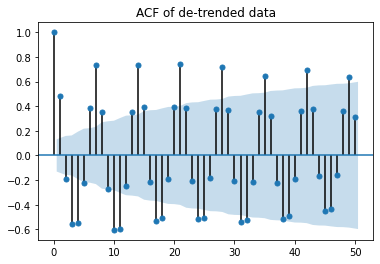

In [22]:
plt.plot(x)
# raw data
plot_acf(x.dropna(),lags=50)
plt.title('ACF of raw data')
# detrending
plot_acf(x1.dropna(),lags=50)
plt.title('ACF of de-trended data')
# the seasonality is 12

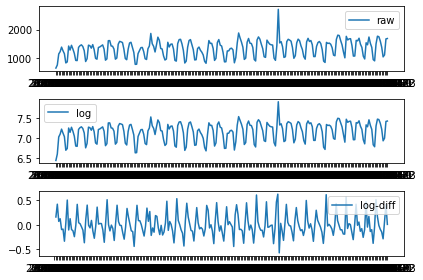

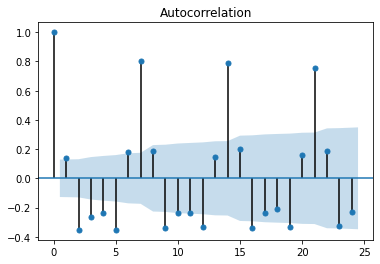

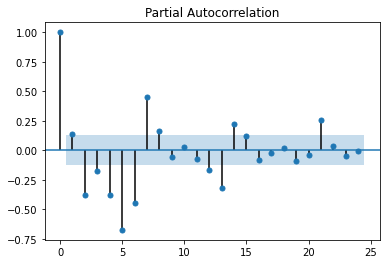

In [23]:
x_log = log(x)
x_log_diff = x_log - x_log.shift()
plt.figure
plt.subplot(3,1,1)
plt.plot(x,label='raw')
plt.legend()
plt.subplot(3,1,2)
plt.plot(x_log,label = 'log')
plt.legend()
plt.subplot(3,1,3)
plt.plot(x_log_diff,label = 'log-diff')
plt.legend()
plt.tight_layout()

plot_acf(x_log_diff.dropna())
plot_pacf(x_log_diff.dropna())
plt.show()

# Difference between Stationary and Seasonality 


Seasonality and stationarity are two different concepts in time series analysis.

Seasonality refers to repeating patterns in a time series that occur at regular intervals. For example, a time series representing daily sales might show a yearly pattern, where sales are highest during the holiday season and lowest during the summer.

Stationarity refers to the statistical property of a time series in which its mean, variance, and autocovariance do not change over time. A stationary time series is more predictable and easier to model than a non-stationary time series.

Seasonality and stationarity are not mutually exclusive. A time series can have both seasonality and be stationary, or it can have neither. However, in practice, most time series models assume stationarity, so it is often necessary to make the time series stationary by removing the trend and seasonality component before modeling.

In summary, seasonality refers to repeating patterns in a time series, while stationarity refers to a time series where the statistical properties do not change over time. These two concepts are related but not the same, and understanding the difference is important for effective time series analysis.

#Linear Regression

                            OLS Regression Results                            
Dep. Variable:              Softwares   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     15.29
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           0.000121
Time:                        16:49:44   Log-Likelihood:                -1660.8
No. Observations:                 235   AIC:                             3326.
Df Residuals:                     233   BIC:                             3332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1198.3613     37.065     32.332      0.0

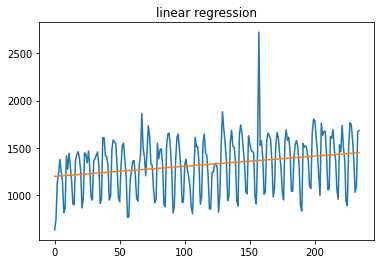

In [24]:
y = df['Figma (software)']
x = range(len(y))
df2 = df
df2['Time'] = x 
df2['Softwares'] = y 
poly_1 = smf.ols(formula='Softwares ~ 1 + Time', data=df2).fit()
print(poly_1.summary())
y1 = poly_1.predict()
plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.title('linear regression')
e = y-y1
xm = np.mean(x)
n = len(x)
se_b1 = np.sqrt((sum(e**2)/(n-2)) / sum((x-xm)**2))
se_b0 = np.sqrt((sum(e**2)/(n-2)) * (1/n + (xm**2)/sum((x-xm)**2)))
b0, b1 = poly_1.params
t1 = b1/se_b1
t0 = b0/se_b0
p0 = 2*(1-sts.t.cdf(abs(t0), df=n-2))
p1 = 2*(1-sts.t.cdf(abs(t1), df=n-2))

print('std error of b0: ', se_b0)
print('std error of b1: ', se_b1)
print('test statistic of b0: ', t0)
print('test statistic of b1: ', t1)
print('CI of b0: ', b0+sts.t.ppf(0.025, df=n-2)*se_b0,b0+sts.t.ppf(0.975, df=n-2)*se_b0)
print('CI of b1: ', b1+sts.t.ppf(0.025, df=n-2)*se_b1,b1+sts.t.ppf(0.975, df=n-2)*se_b1)
print('p-value b0: ', p0)
print('p-value of b1: ', p1)

sst = sum((y-np.mean(y))**2)
ssr = sum((y1-np.mean(y))**2)
R2 = ssr/sst
print('R-squared: ', R2)

Linear regression can be applied to time series data as well. In a time series linear regression model, the dependent variable is modeled as a linear function of one or more past values of the dependent variable, as well as past or current values of independent variables (if any). The goal is to use the historical data to make predictions about future values of the dependent variable.

It is important to note that time series data has unique characteristics, such as autocorrelation and trend, that must be taken into account when building a time series regression model. Techniques such as differencing, stationary transformations, and the use of lagged variables are often used to address these issues. In addition, more advanced time series methods, such as ARIMA and SARIMA, may be more appropriate for modeling time series data than simple linear regression, depending on the data and the goals of the analysis.

ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) models are more appropriate for modeling time series data than simple linear regression for several reasons:

Time series data often exhibit autocorrelation, meaning that the values of the series at different time points are correlated with each other. ARIMA and SARIMA models are specifically designed to model and capture the autocorrelation in time series data, making them more suitable for this type of data than linear regression, which assumes independence between observations.

Time series data can also exhibit seasonality, meaning that there is a recurring pattern that repeats itself over time. SARIMA models are designed to model and capture both autocorrelation and seasonality in time series data.

ARIMA and SARIMA models can also handle non-stationary time series data, where the mean or variance changes over time. These models have integrated components that allow them to transform the time series data into a stationary time series, making it easier to model the data and make accurate predictions.

Therefore, depending on the goals of the analysis and the characteristics of the time series data, ARIMA and SARIMA models may be more appropriate than simple linear regression for modeling time series data.

1. If the p-value is 0, it means that the observed result is extremely unlikely to have occurred by chance, given the null hypothesis. This provides strong evidence against the null hypothesis and in favor of the alternative hypothesis. Typically, a p-value less than 0.05 (or 5%) is considered statistically significant and is used as a threshold for rejecting the null hypothesis. However, a p-value of 0 is even more significant and provides even stronger evidence against the null hypothesis.





#Modelling

The Models used are


1.   SARIMAX
2.   ARIMA
3.   MA
4.   ARMA
5.   SEASONAL SARIMAX


#SARIMAX 

Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) is a statistical model for time series data that combines the capabilities of the SARIMA (Seasonal AutoRegressive Integrated Moving Average) and the X (eXogenous regressors) model. It allows for the modeling of both the seasonal and non-seasonal components of a time series, as well as the influence of external variables.

#Why take log of a variable for modelling even if after applying log, the variable may not be stationary?

Taking the logarithm of a variable can help to stabilize the variance of the data,

 which can make the relationship between the independent and dependent variables more linear. Log transformations can also help to reduce the influence of outliers and reduce the skewness of the data distribution, which can improve the model's ability to make accurate predictions. Although the log transformation may not always result in a stationary time series, it can still be useful for modeling purposes. In cases where the transformed variable is not stationary, additional steps, such as difference or seasonal difference, can be taken to make the series stationary.

In [25]:
df1 = pd.read_csv('./Wikipedia_data.csv')

In [39]:
df1.Date = pd.to_datetime(df1.Date)
x = df1['Figma (software)']
#x = x - x.shift()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


10.0


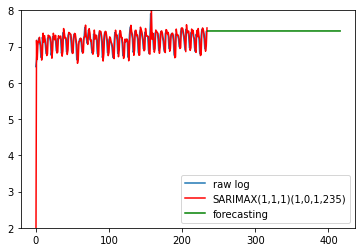

In [40]:
x_log = log(x)


model = SARIMAX(x_log, order=(1, 1, 1), seasonal_order=(1, 0, 1, 235),  enforce_invertibility=False, enforce_stationarity=False)
results_SARIMAX = model.fit(disp=0)
print(results_SARIMAX.aic)
pred = results_SARIMAX.forecast(182)  

#ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC: -471

plt.figure()
plt.plot(x_log,label='raw log')
plt.plot(results_SARIMAX.fittedvalues, color='red', label = 'SARIMAX(1,1,1)(1,0,1,235)')
plt.plot(pred, color='green', label='forecasting')
plt.ylim(2,8)
plt.legend()

#ARIMA MODEL

(AutoRegressive Integrated Moving Average) is a statistical model for time series data that is used for forecasting. It models the temporal structure of a time series by incorporating the past values of the series, as well as the differences between consecutive values (integration).

The line err = results_ARMA.fittedvalues - x_log_diff is subtracting the original difference of the logarithm of the time series data (x_log_diff) from the fitted values (results_ARMA.fittedvalues) of the SARIMA model. This represents the error or residuals of the SARIMA model's predictions.

Calculating the residuals is important in time series analysis as it provides a measure of how well the model fits the data. The residuals should ideally be random and have a mean of zero, with no clear patterns or trends. This indicates that the model is capturing the underlying structure of the data well.

If the residuals have a clear pattern or trend, it indicates that the model is not capturing some important aspect of the data, and further refinement or a different model may be necessary. By analyzing the residuals, one can gain insights into the strengths and weaknesses of the model and make appropriate adjustments.

#Residual Sum of Squared errors

RSS stands for Residual Sum of Squares, which is a measure of the discrepancy between the predicted values and the actual values in a regression model. In an ARMA (AutoRegressive Moving Average) model, the residuals are the differences between the observed and predicted values, and the RSS is calculated as the sum of the squared residuals. The RSS is used to assess the goodness of fit of an ARMA model and is often used as a criterion for model selection and parameter estimation.

The value of the Residual Sum of Squares (RSS) does not have an absolute interpretation of "goodness of fit" on its own. Instead, it is used in relation to other models, or in combination with other metrics, to determine the goodness of fit of a particular ARMA model.

A smaller value of RSS generally indicates a better fit of the model to the data, as it means that the model is able to explain a larger portion of the variance in the data. However, a smaller value of RSS does not necessarily guarantee a good fit, as the model could be overfitting the data and not generalizing well to new, unseen data.

Additionally, the value of the RSS depends on the scale of the response variable and the number of observations, so it is important to use metrics that are normalized or scale-invariant, such as the Root Mean Squared Error (RMSE) or the R-squared, in combination with the RSS to assess the goodness of fit.

Used mostly in regression models

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


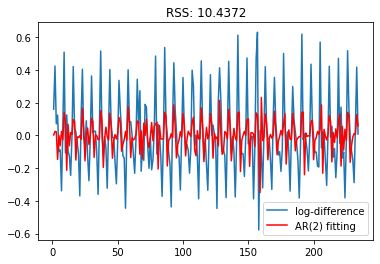

In [28]:
model = ARIMA(x_log, order=(2, 1, 0))
results_AR = model.fit(disp=-1)
fitted_AR = results_AR.fittedvalues
plt.figure()
plt.plot(x_log_diff)
plt.plot(fitted_AR, color='red')
err = fitted_AR-x_log_diff
RSS = sum((err.dropna())**2)
plt.title('RSS: %.4f'% RSS)
plt.legend(['log-difference','AR(2) fitting'])

#MA Modelling

(Moving Average) is a statistical model for time series data that models the temporal structure of a time series by incorporating the past errors or residuals. It is used to model the short-term fluctuations of a time series.

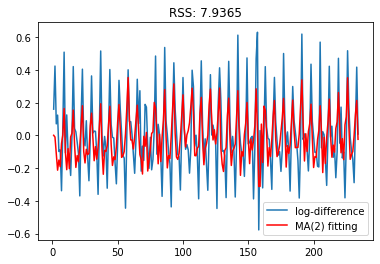

In [29]:
model = ARIMA(x_log, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.figure()
plt.plot(x_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
err = results_MA.fittedvalues-x_log_diff
plt.title('RSS: %.4f'% sum((err.dropna())**2))
plt.legend(['log-difference','MA(2) fitting'])

#ARMA Modelling

(AutoRegressive Moving Average) is a statistical model for time series data that combines the capabilities of the AR (AutoRegressive) and MA (Moving Average) models. It allows for the modeling of both the short-term and long-term dependencies of a time series.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


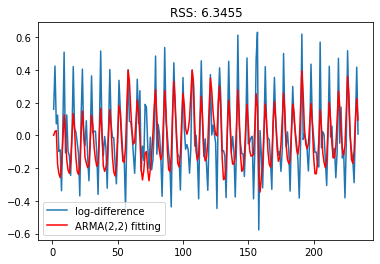

In [30]:
model = ARIMA(x_log, order=(2, 1, 2))
results_ARMA = model.fit(disp=0)
plt.figure()
plt.plot(x_log_diff)
plt.plot(results_ARMA.fittedvalues, color='red')
err = results_ARMA.fittedvalues-x_log_diff
plt.title('RSS: %.4f'% sum((err.dropna())**2))
plt.legend(['log-difference','ARMA(2,2) fitting'])

In [31]:
x_log[0]

6.448889394146858

**The difference between ARMA and ARIMA** is the integration part. The integrated I stands for the number of times differencing is needed to make the times series stationary. ARIMA models are widely used for real life time series analysis since most times series data are non stationary and need differencing.

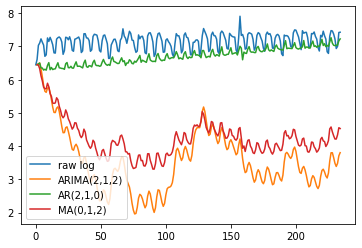

In [32]:
# recover the data using the ARMA model

predictions_ARIMA_diff = results_ARMA.fittedvalues
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum_ARMA = predictions_ARIMA_diff_cumsum + 1*x_log[0]



predictions_ARIMA_diff = results_AR.fittedvalues
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum_AR = predictions_ARIMA_diff_cumsum + 1*x_log[0]


predictions_ARIMA_diff = results_MA.fittedvalues
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum_MA = predictions_ARIMA_diff_cumsum + 1*x_log[0]


plt.figure()
plt.plot(x_log,label='raw log')
plt.plot(predictions_ARIMA_diff_cumsum_ARMA,label='ARIMA(2,1,2)')
plt.plot(predictions_ARIMA_diff_cumsum_AR,label='AR(2,1,0)')
plt.plot(predictions_ARIMA_diff_cumsum_MA,label='MA(0,1,2)')
plt.legend()

In the given code, x_log[0] is the first element of the array x_log, which is likely the logarithm of some original time series data (e.g. df_comp.market_value).

The line predictions_ARIMA_diff_cumsum_MA = predictions_ARIMA_diff_cumsum + 1*x_log[0] is adding this value back to the cumulative sum of the fitted values (predictions_ARIMA_diff_cumsum) to undo the logarithmic transformation and obtain the original scale of the time series data.

This is often done in time series analysis when working with logarithmically transformed data, as the logarithmic transformation can stabilize the variance and make the data more stationary. By undoing the transformation, we can obtain the original scale of the time series data and obtain predictions in the original scale.

#Seasonal SARIMAX

Seasonal SARIMAX is a variation of the SARIMAX model that includes the seasonal component of the time series. It is used to model time series with a repeating pattern that occurs over a fixed period of time (e.g. daily, weekly, or monthly data) and take into account the influence of external variables.

SARIMA (Seasonal AutoRegressive Integrated Moving Average) is a statistical model that extends the ARIMA model by adding a seasonal component to model time series data with seasonality patterns. In SARIMA modeling, the (p,d,q) parameters are used to model the non-seasonal component of the series, while the (P,D,Q,s) parameters are used to model the seasonal component, where:


s: the number of seasons (usually 12 for monthly data)

(P,D,Q) are the seasonal versions of (p,d,q), i.e. the number of seasonal autoregressive (SAR), differences (SD), and moving average (SMA) terms, respectively.


The number of seasonal autoregressive (SAR) terms (P) in a SARIMA model can be determined through experimentation and model selection techniques such as:

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots: The shape of the seasonal ACF and PACF can help identify the appropriate number of SAR terms.

Model selection criteria such as Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC), which can be used to compare models with different numbers of SAR terms and select the best one based on its value.

Grid search: A systematic method of trying a range of possible values for SAR (and other parameters) and choosing the best combination based on model performance on the training data.


Note that the process of determining SAR terms (and other parameters) can be time-consuming and require some expertise in time series analysis.


Yes, that's correct. **The shape of the seasonal Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) can be useful in determining the appropriate number of seasonal autoregressive (SAR) terms in a SARIMA model.**

Typically, if the seasonal ACF shows a strong correlation at a specific lag (s), it is likely that the series has a seasonal pattern with a seasonality of s. This may suggest that a SAR term should be included to model the seasonal pattern.

Similarly, if the seasonal PACF cuts off quickly after the first few lags (s), it is a sign that a SAR term should be included. On the other hand, if the seasonal PACF slowly tapers off, it may suggest that a moving average (SMA) term should be used instead of a SAR term.

It's worth noting that these are only guidelines and that the actual number of SAR terms may still need to be determined through trial and error or through model selection techniques like AIC or BIC.

#Diagnostics

The plot_diagnostics method in the results object of a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with exogenous variables) model is used to diagnose the fit of the model. It creates several plots that help to assess the quality of the model fit, including:

Histogram of residuals: This plot shows the distribution of the residuals, which should be roughly normal if the model is a good fit.

Normal Q-Q plot: This plot shows the residuals against the theoretical normal quantiles. If the residuals are normally distributed, the points in this plot should form a straight line.

Correlogram of residuals: This plot shows the autocorrelation function (ACF) of the residuals. The residuals should be uncorrelated, and this plot should show that the residuals are not significantly correlated at any lag.

Scale-Location plot: This plot shows the residuals against the fitted values. The residuals should be evenly spread around zero and not have a pattern indicating non-constant variance.

These plots help to assess the validity of the assumptions made by the SARIMAX model, such as normally distributed residuals and constant variance. If the assumptions are not met, it may indicate that the model is not a good fit for the data, and alternative models should be considered.






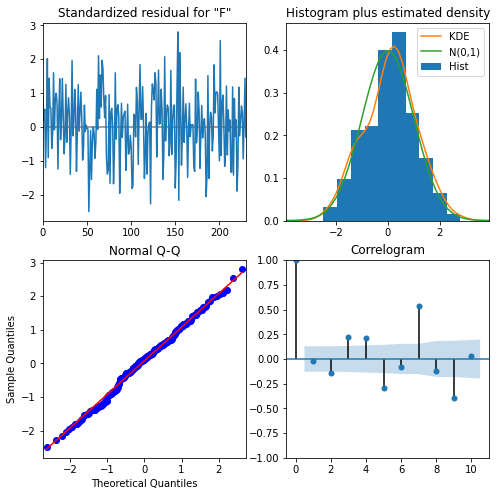

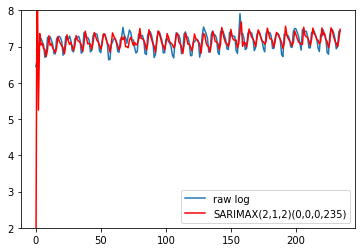

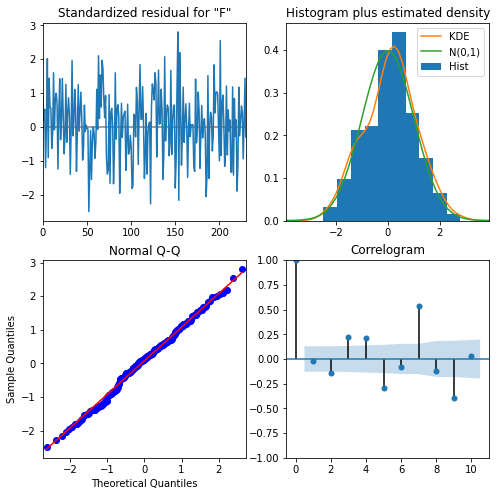

In [33]:
#x_log = x
model = SARIMAX(x_log, order=(2, 1, 2), seasonal_order=(0, 0, 0, 235),  enforce_invertibility=False, enforce_stationarity=False)
#model = SARIMAX(x_log, order=(1, 1, 1), seasonal_order=(1, 0, 1, 235),  enforce_invertibility=False, enforce_stationarity=False)
results_SARIMAX = model.fit(disp=0)
pred = results_SARIMAX.forecast(182)

plt.figure()
plt.plot(x_log,label='raw log')
plt.plot(results_SARIMAX.fittedvalues, color='red', label = 'SARIMAX(2,1,2)(0,0,0,235)')
plt.ylim(2,8)
plt.legend()
results_SARIMAX.plot_diagnostics(figsize=(8, 8))


The residuals should ideally have a mean of zero and be uncorrelated, with constant variance and a normal distribution. If the residuals do not meet these assumptions, it may indicate that the model is not a good fit for the data and may need to be improved or refined.

The correlogram is a commonly used tool for checking randomness in a data set. If random, autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

In [34]:
print(results_SARIMAX.summary())

                               SARIMAX Results                                
Dep. Variable:       Figma (software)   No. Observations:                  235
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  92.539
Date:                Wed, 01 Feb 2023   AIC                           -175.078
Time:                        16:50:14   BIC                           -157.866
Sample:                             0   HQIC                          -168.136
                                - 235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0336      0.072     14.398      0.000       0.893       1.174
ar.L2         -0.7084      0.049    -14.446      0.000      -0.804      -0.612
ma.L1         -1.4330      0.094    -15.192      0.0

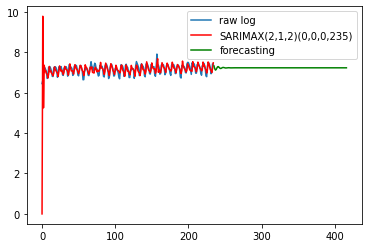

In [35]:
plt.figure()
plt.plot(x_log,label='raw log')
plt.plot(results_SARIMAX.fittedvalues, color='red', label = 'SARIMAX(2,1,2)(0,0,0,235)')
plt.plot(pred, color='green', label = 'forecasting')
plt.legend()

#Notes

**(P,D,Q) are the seasonal versions of (p,d,q), i.e. the number of seasonal autoregressive (SAR), differences (SD), and moving average (SMA) terms, respectively**

(P,D,Q) are the seasonal versions of (p,d,q), i.e. the number of seasonal autoregressive (SAR), differences (SD), and moving average (SMA) terms, respectively
in a seasonal ARIMA model. The seasonal ARIMA model is used to model time series data that exhibit seasonal patterns, i.e., patterns that repeat at regular intervals such as daily, weekly, or yearly. The parameters (P,D,Q) are used to control the complexity of the model and to determine the best fit to the observed data. The values of (P,D,Q) are determined through a process of model selection, which involves comparing the performance of different models and choosing the one that provides the best fit to the data.




**what is number of seasonal autoregressive (SAR)**
The number of seasonal autoregressive (SAR) terms in a seasonal ARIMA model refers to the number of lags included in the seasonal autoregressive component of the model. It represents the number of previous seasonal values used to predict the current value in the time series. The SAR term is used to capture the relationship between the current value and the past seasonal values, and its value is determined through the process of model selection, which involves comparing the performance of different models and choosing the one that provides the best fit to the data.



**how to arrive at the best number of seasonal autoregressive (SAR)**
The best number of seasonal autoregressive (SAR) terms can be determined through a process of model selection. This typically involves the following steps:

Visual inspection of the time series: The first step is to visually inspect the time series data to determine if it exhibits a seasonal pattern.

Determine the seasonal period: The next step is to determine the seasonal period of the time series data. This is the number of time units (e.g., days, weeks, months) between repeating patterns.

Fit different models: Fit several seasonal ARIMA models with different values of the seasonal autoregressive (SAR) term and other parameters.

Model evaluation: Evaluate the performance of each model using metrics such as Akaike information criterion (AIC), Bayesian information criterion (BIC), mean absolute error (MAE), and root mean squared error (RMSE).

Choose the best model: Choose the model that provides the best fit to the data, as indicated by the lowest values of the evaluation metrics.

These steps can be repeated with different combinations of parameters until the best seasonal ARIMA model is found. It is important to keep in mind that the process of model selection can be time-consuming and requires a good understanding of statistical modeling and time series analysis.



**What is difference D in SARIMA**
In a Seasonal ARIMA (SARIMA) model, the "D" refers to the number of differences required to make the time series stationary. The term "stationary" refers to a time series that has constant statistical properties over time, such as a constant mean and variance. In many cases, real-world time series data are not stationary, and need to be made stationary before modeling.

The "D" term in SARIMA represents the number of times the time series must be differenced to make it stationary. The difference operation involves subtracting the current value of the time series from the previous value, which can help to remove trends and seasonality from the data. The "D" term can be set to any non-negative integer, with a value of 0 indicating that no differencing is needed.

In summary, the "D" term in SARIMA represents the number of times the time series data must be differenced to make it stationary, which is a necessary step in preparing the data for modeling with a SARIMA model.


**what do we set as MA for SARIMA**
In a Seasonal ARIMA (SARIMA) model, the "MA" term refers to the number of moving average terms included in the model. The moving average component of the SARIMA model is used to capture the residual errors in the time series after the effects of autoregression and seasonality have been removed.

The number of moving average terms (MA) in a SARIMA model is set based on the results of model selection. Model selection involves fitting several SARIMA models with different values of the parameters (p, d, q, P, D, Q) and evaluating their performance using metrics such as Akaike information criterion (AIC), Bayesian information criterion (BIC), mean absolute error (MAE), and root mean squared error (RMSE).

The best value of the moving average term (MA) is the one that results in the best fit to the data, as indicated by the lowest values of the evaluation metrics. The process of model selection can be time-consuming and requires a good understanding of statistical modeling and time series analysis.

In summary, the "MA" term in SARIMA represents the number of moving average terms included in the model, and its value is set based on the results of model selection, which involves comparing the performance of different SARIMA models and choosing the one that provides the best fit to the data.





**what is order=(1, 1, 1) and seasonal_order=(1, 0, 1, 235) in SARIMA**
The parameters order=(1, 1, 1) and seasonal_order=(1, 0, 1, 235) in a SARIMA model refer to the non-seasonal and seasonal component of the model, respectively.

The non-seasonal component is defined by order=(p, d, q), where:

p is the number of autoregressive (AR) terms, which capture the relationship between the current value and past values of the time series.
d is the number of differences required to make the time series stationary.
q is the number of moving average (MA) terms, which capture the residual errors in the time series after the effects of autoregression and seasonality have been removed.
In the example, order=(1, 1, 1) means that the model has 1 autoregressive term, 1 difference, and 1 moving average term.

The seasonal component is defined by seasonal_order=(P, D, Q, s), where:

P is the number of seasonal autoregressive (SAR) terms, which capture the relationship between the current value and past seasonal values of the time series.
D is the number of seasonal differences required to make the seasonal component of the time series stationary.
Q is the number of seasonal moving average (SMA) terms, which capture the residual errors in the seasonal component of the time series.
s is the seasonal period, which is the number of time units between repeating patterns in the time series (e.g., 365 for daily data representing a yearly pattern).
In the example, seasonal_order=(1, 0, 1, 235) means that the model has 1 seasonal autoregressive term, 0 seasonal differences, 1 seasonal moving average term, and a seasonal period of 235.

In summary, order=(1, 1, 1) and seasonal_order=(1, 0, 1, 235) define the non-seasonal and seasonal components of a SARIMA model, respectively, and specify the values of the parameters used to capture the patterns in the time series data.





**what is model = SARIMAX(x_log, order=(1, 1, 1), seasonal_order=(1, 0, 1, 235)).**

model = SARIMAX(x_log, order=(1, 1, 1), seasonal_order=(1, 0, 1, 235)) is a Python code line that creates a Seasonal ARIMA (SARIMAX) model.

The SARIMAX function is part of the statsmodels library in Python and is used to fit a SARIMA model to a time series data set. The first argument to the function, x_log, is the time series data that the model will be fit to.

The order and seasonal_order parameters specify the non-seasonal and seasonal components of the SARIMA model, respectively. As explained in my previous answer, order=(1, 1, 1) means that the model has 1 autoregressive term, 1 difference, and 1 moving average term, while seasonal_order=(1, 0, 1, 235) means that the model has 1 seasonal autoregressive term, 0 seasonal differences, 1 seasonal moving average term, and a seasonal period of 235.

In summary, this code line creates a SARIMAX model with a specified set of parameters and fits it to the time series data x_log. The fitted model can then be used to make predictions and analyze the patterns in the data.